In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import os
plt.style.use('ggplot')

In [3]:
train = pd.read_csv('Datasets/train.csv')
test = pd.read_csv('Datasets/test.csv')

In [4]:
train_c = copy.deepcopy(train)
test_c = copy.deepcopy(test)
entire_table = [train_c, test_c]

***
# Analyze data
***

In [5]:
train_c.select_dtypes(['object']).columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [6]:
train_c.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

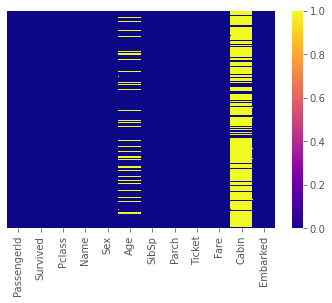

In [7]:
sns.heatmap(train_c.isna(), yticklabels=False, cmap='plasma')

In [8]:
train_c.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Drop Cabin because of too many NaN
for dataset in entire_table:
    dataset.drop('Cabin', axis=1, inplace=True)
train_c.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
train_c.groupby('Survived')['PassengerId'].count()/len(train_c)

Survived
0    0.616162
1    0.383838
Name: PassengerId, dtype: float64

In [11]:
train_c.groupby(['Survived','Sex'])['PassengerId'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

In [12]:
train_c.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


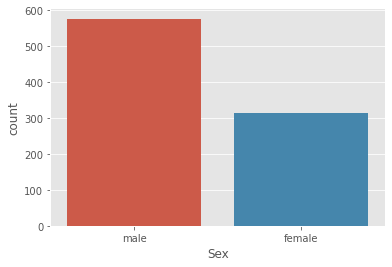

In [13]:
sns.countplot('Sex', data=train_c)

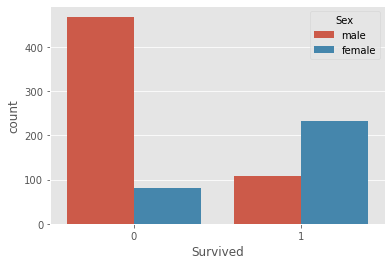

In [14]:
sns.countplot('Survived', hue='Sex', data=train_c)

In [15]:
women_survived = (train_c[train_c['Sex'] == 'female']['Survived'].sum()/
                  train_c[train_c['Sex'] == 'female']['Sex'].count())
print(f'Percentage of women who survived: {women_survived}')

Percentage of women who survived: 0.7420382165605095


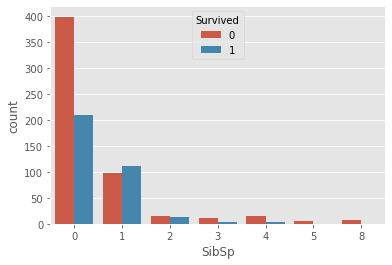

In [16]:
sns.countplot(hue=train_c['Survived'], x=train_c['SibSp'])

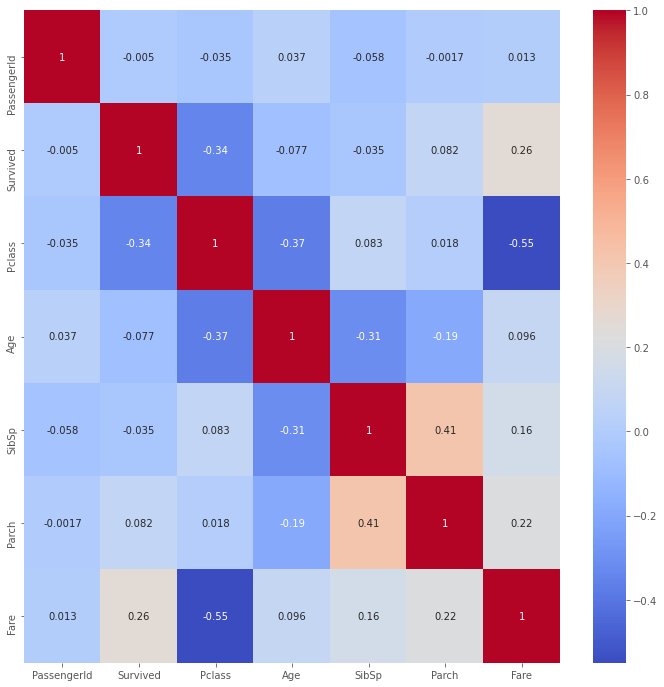

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(train_c.corr(), annot=True, cmap='coolwarm')

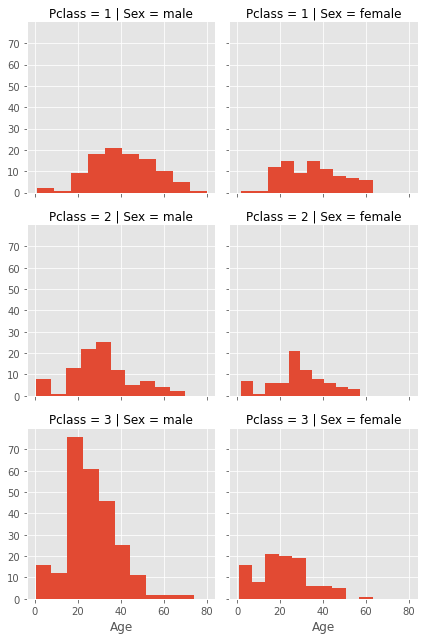

In [18]:
g = sns.FacetGrid(data=train_c, row='Pclass', col='Sex')
g.map(plt.hist, 'Age')

In [19]:
train_c.groupby(['Survived', 'Embarked','Sex'])['Pclass'].count()

Survived  Embarked  Sex   
0         C         female      9
                    male       66
          Q         female      9
                    male       38
          S         female     63
                    male      364
1         C         female     64
                    male       29
          Q         female     27
                    male        3
          S         female    140
                    male       77
Name: Pclass, dtype: int64

C:\Users\patry\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


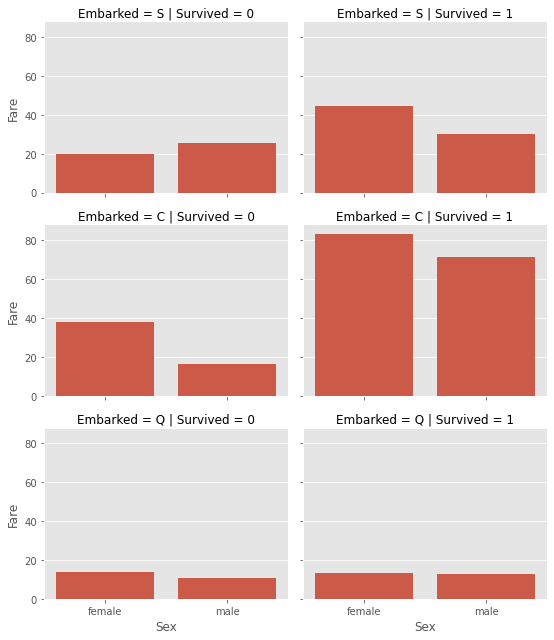

In [20]:
g = sns.FacetGrid(train_c, row='Embarked', col='Survived',aspect=1.3)
g.map(sns.barplot, 'Sex', 'Fare', ci=None)

***
# Preparing data
***

***
*Prepare Embarked column*
***

In [21]:
train_c[pd.isna(train_c['Embarked'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [22]:
for dataset in entire_table:
    dataset['Embarked'].fillna(dataset['Embarked'].value_counts().sort_values(ascending=False).index[0], 
                          inplace=True)

In [23]:
train_c[pd.isna(train_c['Embarked'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [24]:
train_c.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [25]:
# Convert to numeric
for dataset in entire_table:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'Q':1, 'C':2})

In [26]:
train_c.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0


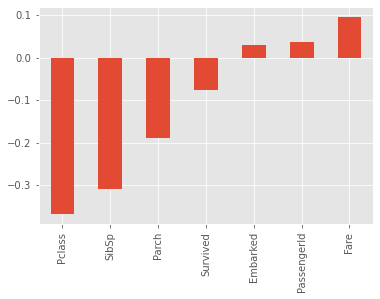

In [27]:
train_c.corr()['Age'].drop('Age').sort_values().plot(kind='bar')

***
*Prepare Age column*
***

In [28]:
train_c.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0


In [29]:
train_c.groupby(['Sex', 'Pclass'])['Age'].median()

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [30]:
f_class_1, f_class_2, f_class_3, \
m_class_1, m_class_2, m_class_3, = train_c.groupby(['Sex', 'Pclass'])['Age'].median()
dict_age = {'female':{1: f_class_1, 2: f_class_2, 3: f_class_3}, 
            'male':{1: m_class_1, 2: m_class_2, 3: m_class_3}}

def median_age_class(col):
    #function replacing NaN age. Function needs 3 values, col[0] - Age, col[1] - Pclass, col[2] - Sex_male
    if pd.isna(col[0]):
        #return appropriate value of age to replace NaN
        return dict_age[col[2]][col[1]]
    else:
        return col[0]

In [31]:
for dataset in entire_table:
    dataset['Age'] = dataset[['Age', 'Pclass','Sex']].apply(median_age_class, axis=1)

train_c[pd.isna(train_c['Age'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [32]:
for dataset in entire_table:
    dataset.drop('PassengerId', inplace=True, axis=1)
train_c.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0


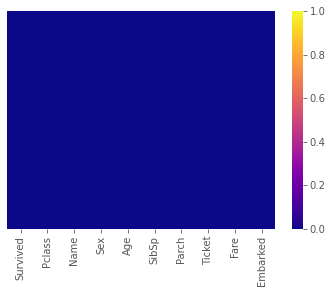

In [33]:
# Check if all NaN were replaced
sns.heatmap(train_c.isna(), yticklabels=False, cmap='plasma', vmin=0, vmax=1)

***
*Create Family column (sum of SibSp an d Parch)*
***

In [34]:
train_c.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0


In [35]:
for dataset in entire_table:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch'] + 1

train_c['Family'].value_counts().sort_values(ascending=False)

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [36]:
for dataset in entire_table:
    dataset.drop(['SibSp', 'Parch'], axis=1, inplace=True)

***
*Create Title column (extraction essential information from Name)*
***

In [37]:
for dataset in entire_table:
    dataset['Title'] = dataset['Name'].str.extract(r'(\w+)[\.]')
train_c.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,0,2,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,2,2,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,0,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,0,2,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,0,1,Mr


In [38]:
for dataset in entire_table:
    dataset.drop('Name', axis=1, inplace=True)
train_c.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Family,Title
0,0,3,male,22.0,A/5 21171,7.2500,0,2,Mr
1,1,1,female,38.0,PC 17599,71.2833,2,2,Mrs
2,1,3,female,26.0,STON/O2. 3101282,7.9250,0,1,Miss
3,1,1,female,35.0,113803,53.1000,0,2,Mrs
4,0,3,male,35.0,373450,8.0500,0,1,Mr


In [39]:
train_c['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [40]:
train_c['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Don           1
Sir           1
Jonkheer      1
Ms            1
Lady          1
Capt          1
Mme           1
Name: Title, dtype: int64

In [41]:
test_c['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [42]:
other_title = ['Mme',  'Ms', 'Mlle', 'Mr', 'Miss', 'Mrs', 'Master']
replace_title = ['Mme', 'Ms', 'Mlle']
title_map = {'Mme': 'Mrs', 'Ms': 'Mrs', 'Mlle': 'Mr'}

for dataset in entire_table:
    dataset['Title'] = dataset['Title'].apply(lambda title: 'Other' if title not in other_title
                                          else (title.replace(title, title_map[title]) 
                                                if title in replace_title else title))
train_c['Title'].value_counts().sort_values(ascending=False)

Mr        519
Miss      182
Mrs       127
Master     40
Other      23
Name: Title, dtype: int64

In [43]:
map_title = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Other': 4}
for dataset in entire_table:
    dataset['Title'] = dataset['Title'].map(map_title)
train_c['Title'].value_counts()

0    519
1    182
2    127
3     40
4     23
Name: Title, dtype: int64

***
*Correction Fare column base on Ticket and Family column*
***

In [44]:
train_c['Ticket'].value_counts().sort_values(ascending=False)

347082       7
CA. 2343     7
1601         7
3101295      6
347088       6
            ..
350052       1
Fa 265302    1
350407       1
6563         1
14312        1
Name: Ticket, Length: 681, dtype: int64

In [45]:
train_c[train_c['Ticket'] == '347082']

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Family,Title
13,0,3,male,39.0,347082,31.275,0,7,0
119,0,3,female,2.0,347082,31.275,0,7,1
541,0,3,female,9.0,347082,31.275,0,7,1
542,0,3,female,11.0,347082,31.275,0,7,1
610,0,3,female,39.0,347082,31.275,0,7,2
813,0,3,female,6.0,347082,31.275,0,7,1
850,0,3,male,4.0,347082,31.275,0,7,3


In [46]:
def price_ticket(col):
    # Function divides costs of ticket by family members
    fare = col[1]
    family = col[0]
    return fare/family

In [47]:
for dataset in entire_table:
    dataset['Fare'] = dataset[['Family', 'Fare']].apply(price_ticket, axis=1)

In [48]:
for dataset in entire_table:
    dataset.drop('Ticket', inplace=True, axis=1)
train_c.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Title
0,0,3,male,22.0,3.62500,0,2,0
1,1,1,female,38.0,35.64165,2,2,2
2,1,3,female,26.0,7.92500,0,1,1
3,1,1,female,35.0,26.55000,0,2,2
4,0,3,male,35.0,8.05000,0,1,0


In [49]:
train_c.select_dtypes([object]).columns

Index(['Sex'], dtype='object')

In [50]:
train_c['Fare'].max()

512.3292

In [51]:
pd.qcut(train_c['Fare'], q=5)

0       (-0.001, 7.142]
1      (26.55, 512.329]
2         (7.896, 10.5]
3         (10.5, 26.55]
4         (7.896, 10.5]
             ...       
886       (10.5, 26.55]
887    (26.55, 512.329]
888     (-0.001, 7.142]
889    (26.55, 512.329]
890      (7.142, 7.896]
Name: Fare, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.142] < (7.142, 7.896] < (7.896, 10.5] < (10.5, 26.55] < (26.55, 512.329]]

In [52]:
pd.qcut(train_c['Fare'], q=5, labels=[0,1,2,3,4]).cat.codes

0      0
1      4
2      2
3      3
4      2
      ..
886    3
887    4
888    0
889    4
890    1
Length: 891, dtype: int8

In [53]:
pd.cut(train_c['Fare'], [0, 7.142, 7.896, 10.5, 26.55, 512.329], 
       labels=[0,1,2,3,4], include_lowest=True).cat.codes

0      0
1      4
2      2
3      3
4      2
      ..
886    3
887    4
888    0
889    4
890    1
Length: 891, dtype: int8

In [54]:
# Split Fare to category
for dataset in entire_table:
    dataset['Fare_cut'] = pd.cut(dataset['Fare'], [0, 7.796, 11.025, 21.438, 46.62, 512.33], 
       labels=[0,1,2,3,4], include_lowest=True).cat.codes
train_c['Fare_cut'].value_counts()

0    314
1    232
3    155
2    120
4     70
Name: Fare_cut, dtype: int64

In [56]:
train_c.groupby('Fare_cut')['Survived'].mean()

Fare_cut
0    0.292994
1    0.254310
2    0.458333
3    0.561290
4    0.700000
Name: Survived, dtype: float64

In [57]:
for dataset in entire_table:
    dataset.drop('Fare', axis=1, inplace=True)

In [58]:
pd.qcut(train_c['Age'], q=5)

0       (20.0, 25.0]
1       (30.0, 40.0]
2       (25.0, 30.0]
3       (30.0, 40.0]
4       (30.0, 40.0]
           ...      
886     (25.0, 30.0]
887    (0.419, 20.0]
888     (20.0, 25.0]
889     (25.0, 30.0]
890     (30.0, 40.0]
Name: Age, Length: 891, dtype: category
Categories (5, interval[float64]): [(0.419, 20.0] < (20.0, 25.0] < (25.0, 30.0] < (30.0, 40.0] < (40.0, 80.0]]

In [59]:
# Split Age to category 
for dataset in entire_table:
    dataset['Age_cut'] = pd.cut(dataset['Age'], [0.419, 20.0, 25.0, 30.0, 40.0, 80.0], 
                                labels=[0,1,2,3,4]).cat.codes
train_c['Age_cut'].value_counts()

1    258
3    185
0    179
4    150
2    119
Name: Age_cut, dtype: int64

In [60]:
# Split Age to category 
# train_c['Age_cut'] = pd.qcut(train_c['Age'], q=5, labels=[0,1,2,3,4]).cat.codes
# train_c['Age_cut'].value_counts()

In [61]:
train_c.groupby('Age_cut')['Survived'].mean()

Age_cut
0    0.458101
1    0.294574
2    0.386555
3    0.448649
4    0.366667
Name: Survived, dtype: float64

In [62]:
# create column (multiplication Age_cut and Pclass)
def multi_col(col):
    return col[0] * col[1]

for dataset in entire_table:
    dataset['multi_age_class'] = dataset[['Age_cut', 'Pclass']].apply(multi_col, axis=1)

In [63]:
for dataset in entire_table:
    dataset.drop('Age', axis=1, inplace=True)

In [64]:
#Create column if person had family
for dataset in entire_table:
    dataset['IsAlone'] = dataset['Family'].apply(lambda x: 1 if x == 1 else 0)

In [65]:
train_c.head()

,Survived,Pclass,Sex,Embarked,Family,Title,Fare_cut,Age_cut,multi_age_class,IsAlone
0,0,3,male,0,2,0,0,1,3,0
1,1,1,female,2,2,2,3,3,3,0
2,1,3,female,0,1,1,1,2,6,1
3,1,1,female,0,2,2,3,3,3,0
4,0,3,male,0,1,0,1,3,9,1


In [66]:
# Split object column 'Sex'
train_c = pd.get_dummies(data=train_c, columns=['Sex'], drop_first=True)
test_c = pd.get_dummies(data=test_c, columns=['Sex'], drop_first=True)
train_c.head()

,Survived,Pclass,Embarked,Family,Title,Fare_cut,Age_cut,multi_age_class,IsAlone,Sex_male
0,0,3,0,2,0,0,1,3,0,1
1,1,1,2,2,2,3,3,3,0,0
2,1,3,0,1,1,1,2,6,1,0
3,1,1,0,2,2,3,3,3,0,0
4,0,3,0,1,0,1,3,9,1,1


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [68]:
X_train = train_c.drop('Survived', axis=1).values
y_train = train_c['Survived'].values

***
*Scale Data*
***

In [69]:
standard_scaler = StandardScaler()
standard_scaler.fit_transform(X_train)
standard_scaler.transform(test_c)

array([[ 0.82737724,  0.67817453, -0.56097483, ...,  1.68022296,
         0.81192233,  0.73769513],
       [ 0.82737724, -0.58595414,  0.05915988, ...,  2.64711983,
        -1.2316449 , -1.35557354],
       [-0.36936484,  0.67817453, -0.56097483, ...,  1.357924  ,
         0.81192233,  0.73769513],
       ...,
       [ 0.82737724, -0.58595414, -0.56097483, ...,  1.68022296,
         0.81192233,  0.73769513],
       [ 0.82737724, -0.58595414, -0.56097483, ..., -0.25357078,
         0.81192233,  0.73769513],
       [ 0.82737724,  1.9423032 ,  0.67929458, ..., -0.25357078,
        -1.2316449 ,  0.73769513]])

In [70]:
# min_max_scaler = MinMaxScaler()
# min_max_scaler.fit(X_train).transform(X_train)
# min_max_scaler.transform(X_test)

***
*Models for standardscaler data*
***


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [72]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred = logreg.predict(test_c)

log_score = logreg.score(X_train, y_train)
log_score

0.813692480359147

In [73]:
# Decision tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
pred = dec_tree.predict(test_c)

dec_tree_score = dec_tree.score(X_train, y_train)
dec_tree_score

0.8945005611672279

In [74]:
# Gradient Boosting
gr_boo = GradientBoostingClassifier()
gr_boo.fit(X_train, y_train)
pred = gr_boo.predict(test_c)

gr_boo_score = gr_boo.score(X_train, y_train)
gr_boo_score

0.8641975308641975

In [75]:
# KNeighbors
k_neigh = KNeighborsClassifier(n_neighbors=4)
k_neigh.fit(X_train, y_train)
pred = k_neigh.predict(test_c)

k_neigh_score = k_neigh.score(X_train, y_train)
k_neigh_score

0.8406285072951739

In [76]:
# Random Forest
rnd_forest = RandomForestClassifier()
rnd_forest.fit(X_train, y_train)
pred = rnd_forest.predict(test_c)

rnd_forest_score = rnd_forest.score(X_train, y_train)
rnd_forest_score

0.8945005611672279

In [77]:
# SVC
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)
pred = svc.predict(test_c)

svc_score = svc.score(X_train, y_train)
svc_score


0.8327721661054994

In [78]:
# create dataframe of result
score_models = {'Model': ['Logistic Regression', 'Decision Tree', 'Gradient Boosting', 
                          'KNeighbors', 'Random Forest','SVC'],
                'Score': [log_score, dec_tree_score, gr_boo_score, k_neigh_score,
                          rnd_forest_score, svc_score]}
result = pd.DataFrame(data=score_models)
result.sort_values(by='Score', ascending=False)

,Model,Score
1,Decision Tree,0.894501
4,Random Forest,0.894501
2,Gradient Boosting,0.864198
3,KNeighbors,0.840629
5,SVC,0.832772
0,Logistic Regression,0.813692


In [79]:
pred = dec_tree.predict(X_train)
prediction = dec_tree.predict(test_c)

In [80]:
confusion_matrix(y_train, pred)

array([[529,  20],
       [ 74, 268]], dtype=int64)

In [81]:
submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':prediction})

submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [82]:
filename = 'Titanic Predictions 1.csv'

submission.to_csv(filename,index=False)